In [1]:
%matplotlib inline
# %matplotlib widget
from hydrophone_data_processing import load, preprocessing, tempmatch, useful_variables
import obspy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import sklearn.metrics as metrics

from obspy.signal.tf_misfit import cwt

In [2]:
# fig, ax = plt.subplots(figsize=(15, 5))
# bubbles.set_index('time').ones.cumsum().plot(ax=ax)

# event1 = bubbles[bubbles.time.between('2019-05-18 11:30:00', '2019-05-18 14:00:00')].copy()
# # event2 = bubbles[bubbles.time.between('2019-05-18 11:30:00', '2019-05-19 12:45:00')].copy()
# # event3 = bubbles[bubbles.time.between('2019-05-20 13:35:30', '2019-05-21 14:30:00')].copy()
# # event3 = bubbles[bubbles.time.between('2019-05-20 13:35:30', '2019-05-20 17:20:00')].copy()
# event3 = bubbles[bubbles.time.between('2019-05-20 13:35:30', '2019-05-20 14:20:00')].copy()
# event4 = bubbles[bubbles.time.between('2019-08-09 11:00:00','2019-08-09 12:15:00')].copy()

# event5 = bubbles[bubbles.time.between('2019-08-09 13:00:00','2019-08-09 13:15:00')].copy()

# # event5point5 = bubbles[bubbles.time.between('2019-08-09 13:15:00','2019-08-09 13:27:00')].copy()
# event5point5 = bubbles[bubbles.time.between('2019-08-09 13:15:00','2019-08-09 13:27:00')].copy()

# event6 = bubbles[bubbles.time.between('2019-09-29 11:00:00','2019-09-29 11:30:00')].copy()
# event7 = bubbles[bubbles.time.between('2019-10-01 12:00:00','2019-10-01 13:00:00')].copy()
# event8 = bubbles[bubbles.time.between('2019-10-07 10:55:00','2019-10-07 11:05:00')].copy()
# event9 = bubbles[bubbles.time.between('2019-12-08 00:00:00','2019-12-08 01:00:00')].copy()
# # event9 = bubbles[bubbles.time.between('2019-12-08 00:00:00','2019-12-08 01:00:00')].copy()
# event10 = bubbles[bubbles.time.between('2019-12-08 12:50:00','2019-12-08 13:00:00')].copy()
# event11 = bubbles[bubbles.time.between('2019-12-08 13:30:00','2019-12-08 15:30:00')].copy()

In [3]:
# load.create_datafiles(hole='b')

In [4]:
# import obspy

paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.140',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.140',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.140',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.140',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.140',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.140']

stream = obspy.read(paths[0])
for p in paths[1:]:
    stream += obspy.read(p)

stream[3].data = stream[3].data*(-1)
starttime = obspy.UTCDateTime('2019-05-20 13:35:30')

stream.trim(starttime=starttime)

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-20T13:35:30.000000Z - 2019-05-21T00:00:03.749000Z | 1000.0 Hz, 37473750 samples
7F.B00.02.GDH | 2019-05-20T13:35:30.000000Z - 2019-05-21T00:00:00.629000Z | 1000.0 Hz, 37470630 samples
7F.B00.03.GDH | 2019-05-20T13:35:30.000000Z - 2019-05-21T00:00:01.956000Z | 1000.0 Hz, 37471957 samples
7F.B00.04.GDH | 2019-05-20T13:35:30.000000Z - 2019-05-21T00:00:01.984000Z | 1000.0 Hz, 37471985 samples
7F.B00.05.GDH | 2019-05-20T13:35:30.000000Z - 2019-05-21T00:00:00.052000Z | 1000.0 Hz, 37470053 samples
7F.B00.06.GDH | 2019-05-20T13:35:30.000000Z - 2019-05-21T00:00:00.355000Z | 1000.0 Hz, 37470356 samples

100.0

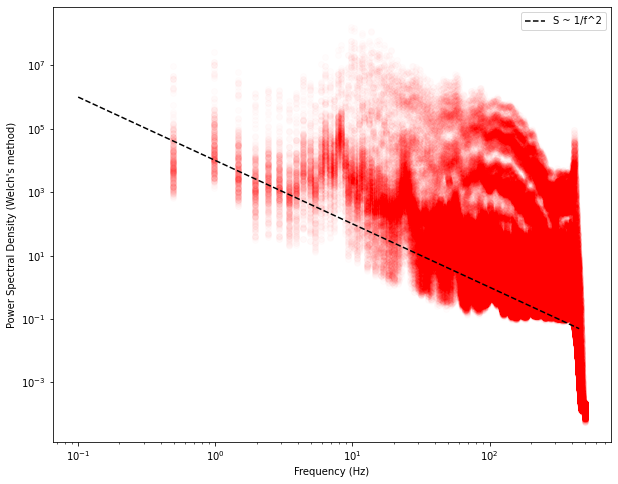

In [52]:
import scipy.signal as signal

fig, ax = plt.subplots(figsize=(10, 8))

window_size = 100000
windows = np.arange(0, stream[0].data.shape[0], 100000)

for w in windows[1:]:
    data = stream[0].data[w-window_size : w]

    f, p = signal.welch(data, fs=1000, nperseg=2048)
    ax.scatter(f, p, color='red', alpha=0.01)

    # f
ax.set_yscale('log')
ax.set_xscale('log')    
ax.set_ylabel("Power Spectral Density (Welch's method)")
ax.set_xlabel('Frequency (Hz)')

x = np.linspace(0.1, 450, 1000)
y = (1 / x**2) * 10000
ax.plot(x, y, color='black', linestyle='--', label='S ~ 1/f^2')
ax.legend()

window_size / 1000

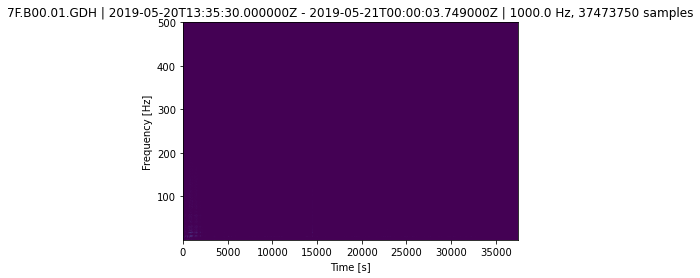

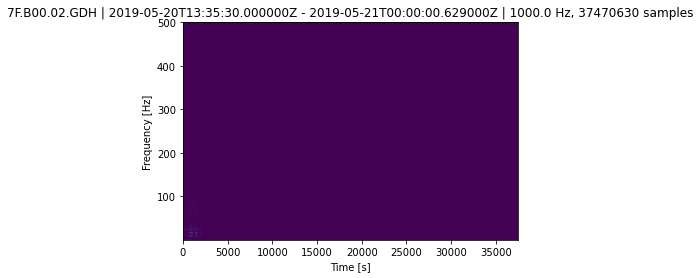

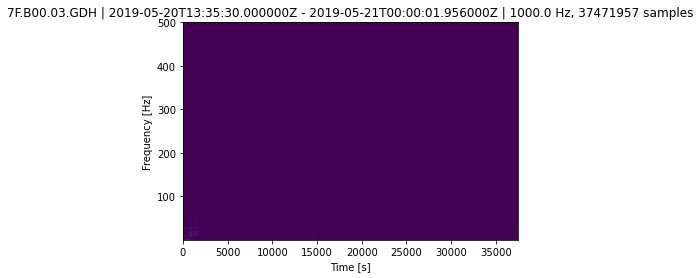

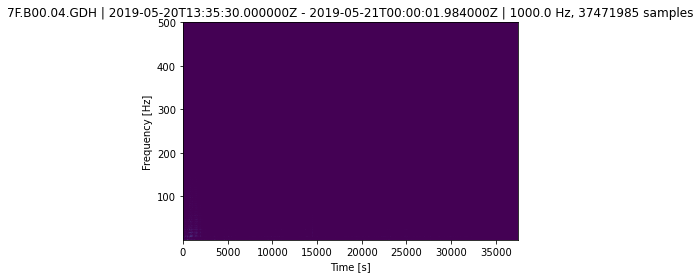

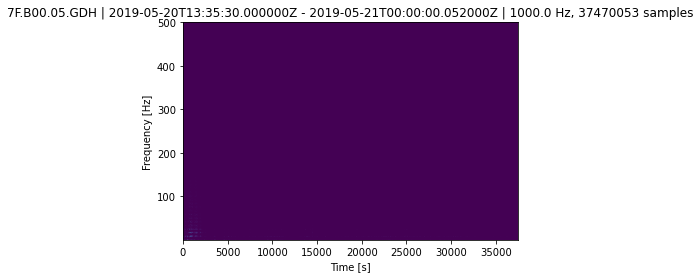

KeyboardInterrupt: 

In [ ]:
# starttime = obspy.UTCDateTime('2019-05-20 13:35:30')
# endtime, '2019-05-20 14:20:00'
# stream.spectrogram()

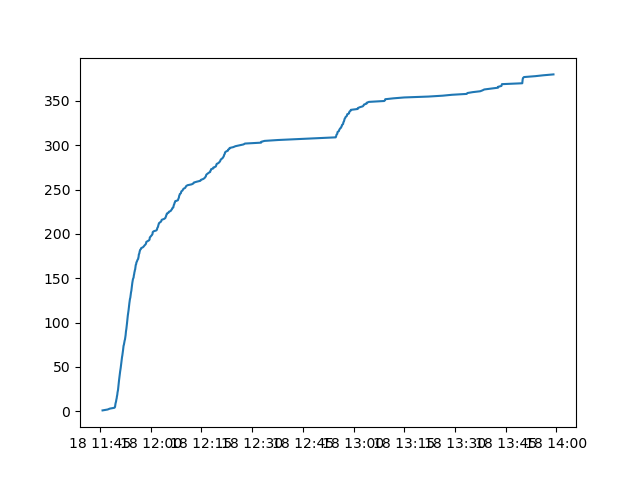

In [5]:
# fig, ax = plt.subplots()
# t = event1.time
# y = event1.ones.cumsum()

# ax.plot(t, y)
# # ax.set_yscale('log')
# # ax.set_xscale('log')

In [6]:
events = [
    event1
    ,event3
    ,event4
    ,event5
    ,event5point5
    ,event6
    ,event7
    ,event8
    ,event9
    ,event10
    ,event11
]

0.6950796955454803

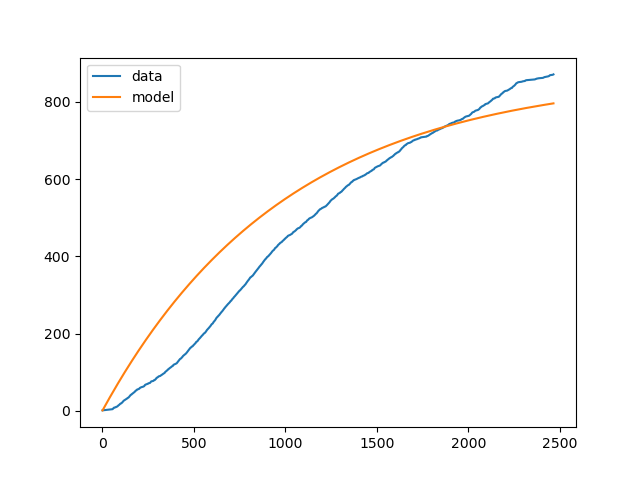

In [7]:
e = events[1]
time = e.time
y = e.ones.cumsum()


t = np.array([t.timestamp() for t in time])
t = t - t.min()
t = t + 1
t = t
y = y
alpha = 1/(t[-1] - t[0])
alpha = 0.995e-3
A = e.shape[0]
nt =  A*(1 - np.exp(-alpha*t))
# nt = 1/t
# nt = 1/t

fig, ax =plt.subplots()
ax.plot(t, y, label='data')
ax.plot(t, nt, label='model')
ax.legend()
# ax.set_xscale('log')
metrics.r2_score(nt, y)

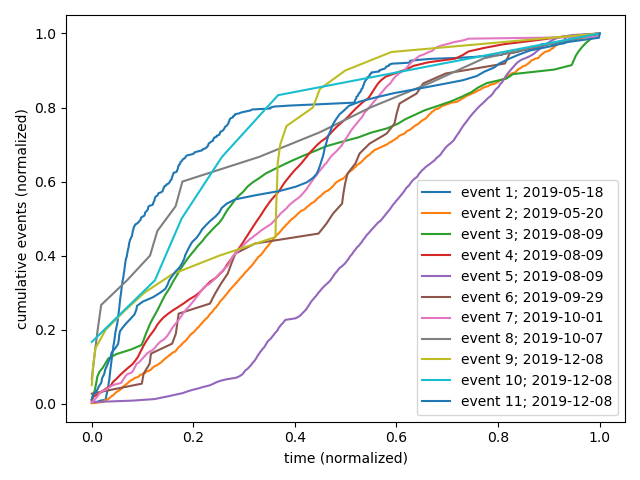

In [8]:
# events = [event1
#           # , event2
#           , event3, event4, event5, event5point5, event6, event7, event8
#           # , event9
#           , event10, event11]
fig, ax = plt.subplots()

for n, e in enumerate(events):
    y = e.ones.cumsum()
    y = y/y.max()
    time = e.time
    t = np.array([t.timestamp() for t in time])
    t = (t - t.min())
    t = t/t.max()
    ax.plot(t, y, label='event {n}; {t}'.format(n=n+1, t=time.min().date()))

ax.legend()
ax.set_ylabel('cumulative events (normalized)')
ax.set_xlabel('time (normalized)')

fig.tight_layout()

[8.44274722e+01 2.97805329e-03]
A:84.42747217134435 alpha:0.0029780532880111787
82 0.0029780532880111787


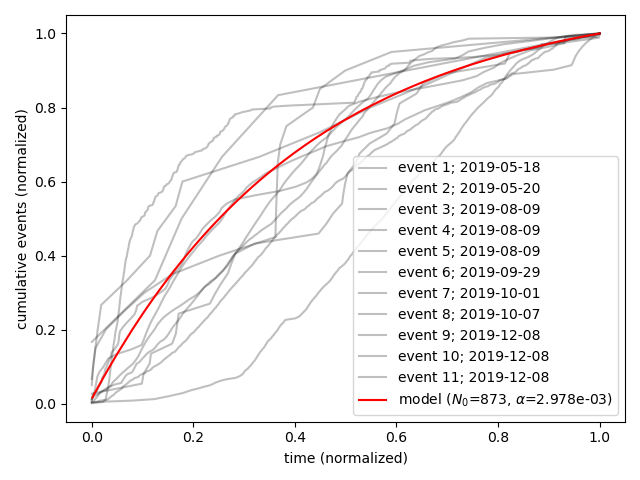

In [9]:
fig, ax = plt.subplots()

for n, e in enumerate(events):
    y = e.ones.cumsum()
    y = y/y.max()
    time = e.time
    t = np.array([t.timestamp() for t in time])
    t = (t - t.min())
    t = t/t.max()
    ax.plot(t, y, label='event {n}; {t}'.format(n=n+1, t=time.min().date()), color='black', alpha=0.25)

ax.set_ylabel('cumulative events (normalized)')
ax.set_xlabel('time (normalized)')

from scipy import optimize
def curvefunc(t, a, b):
    return 1+a*(1 - np.exp(-b*t))

# e = event3
e = event4
y = e.set_index('time').ones.cumsum().values
time = e.set_index('time').ones.cumsum().index
t = np.array([t.timestamp() for t in time])
t = t - t.min()
t = t + 1
params, cov = optimize.curve_fit(curvefunc, t, y, p0=(871, 5/10800))
print(params)
A, alpha = params
print('A:'+str(params[0]),'alpha:'+str(params[1]))
# nt_fit = curvefunc(t, a=A, b=alpha)
# nt_fit = curvefunc(t, a=871, b=alpha)
# nt_fit = curvefunc(t, a=e.shape[0], b=alpha)
nt_fit = curvefunc(t, a=e.shape[0], b=alpha)


# ax.plot(t/t.max(), nt_fit/nt_fit.max(), color='red', label=r'model ($N_0$={A}'.format(A=int(params[0]))+r', $\alpha$={:.3e})'.format(params[1]))
ax.plot(t/t.max(), nt_fit/nt_fit.max(), color='red', label=r'model ($N_0$={A}'.format(A=int(873))+r', $\alpha$={:.3e})'.format(params[1]))
  
ax.legend()

fig.tight_layout()
fig.savefig('supp_alldegass.pdf', bbox_inches='tight')
print(e.shape[0], alpha)

In [10]:
5/10800

0.000462962962962963

N-events: 380 A: 351.43946327921486 alpha: 0.0008132643498728344 r2: 0.9316534481710586
N-events: 871 A: 2837.4017333209385 alpha: 0.0001603004093083399 r2: -0.9249956543639644
N-events: 82 A: 84.42747068937715 alpha: 0.0029780534013881914 r2: 0.9866661841603263
N-events: 103 A: 191.51425734211438 alpha: 0.002123603235228541 r2: 0.1387046163922061
There was RunTimeError, N-events:243 Optimal parameters not found: Number of calls to function has reached maxfev = 600.
N-events: 37 A: 153.90955454080495 alpha: 0.0006398790349415184 r2: -1.2320751316698444
N-events: 214 A: 726.5400281006208 alpha: 0.0005082928270025862 r2: -0.9890698613934643
N-events: 15 A: 12.879323991526755 alpha: 0.014194921589149858 r2: 0.8639107000262424
N-events: 20 A: 24.313099505242345 alpha: 0.0009700686884187918 r2: 0.7913245162527638
N-events: 6 A: 5.476845424360296 alpha: 0.008028040983613231 r2: 0.931028184877367
N-events: 87 A: 91.09933967581688 alpha: 0.0003907431705509778 r2: 0.978679202918782
0.0009700686

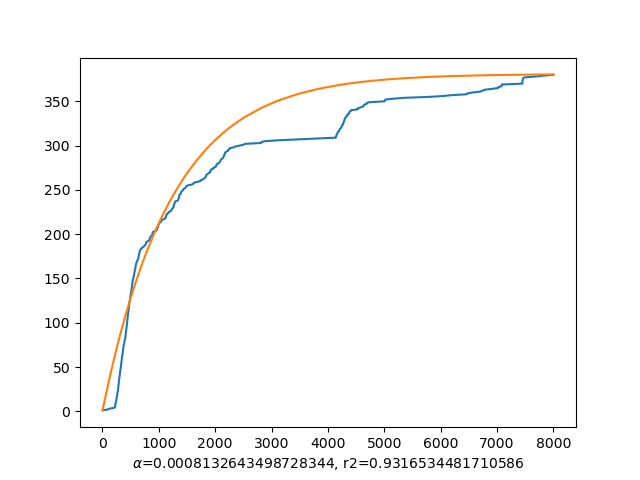

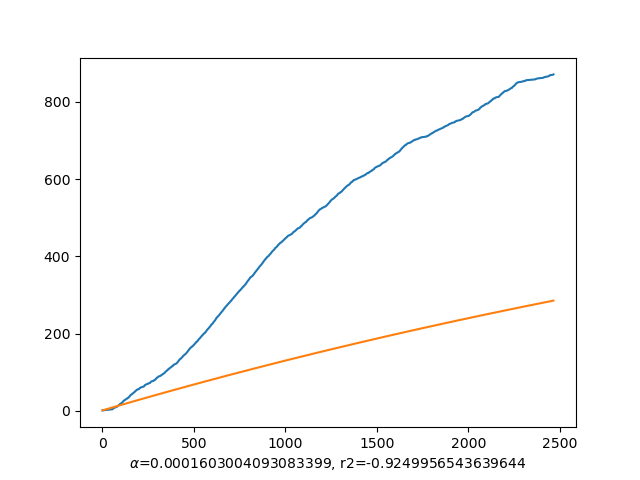

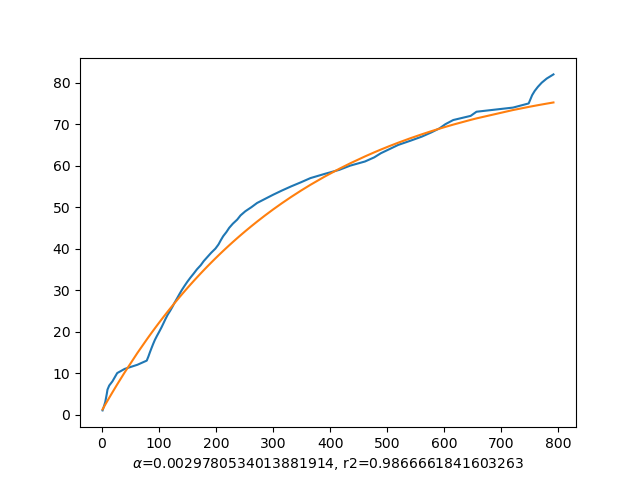

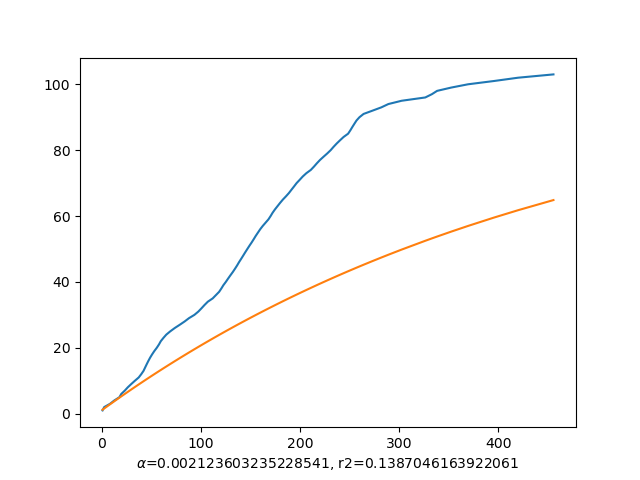

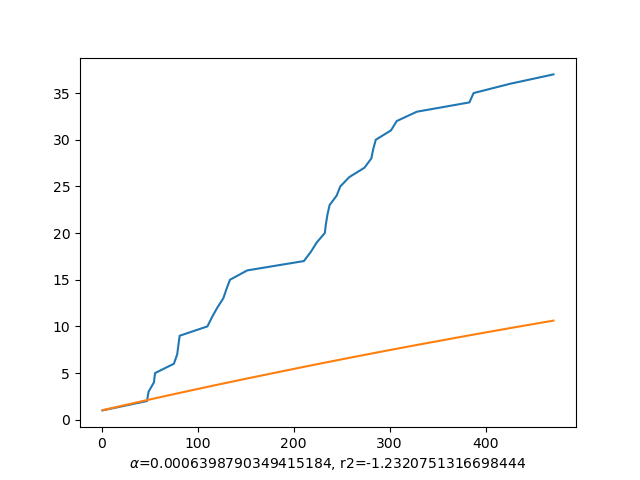

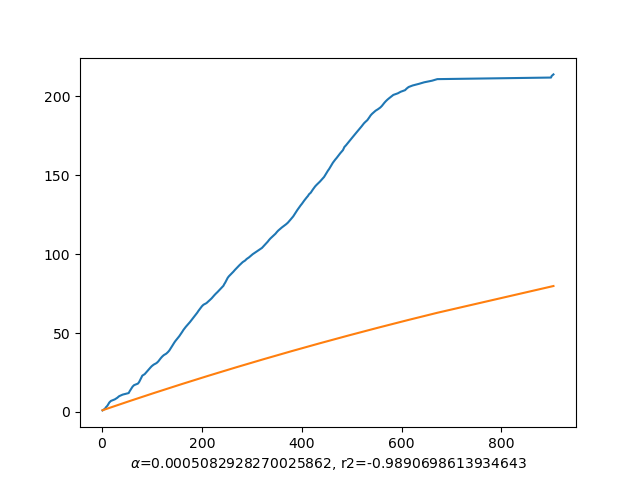

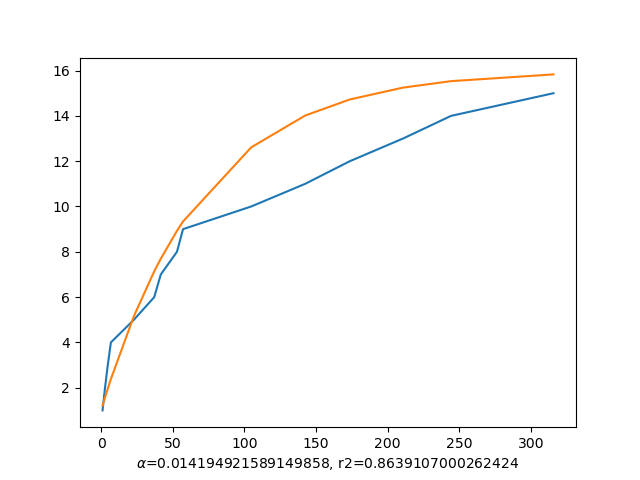

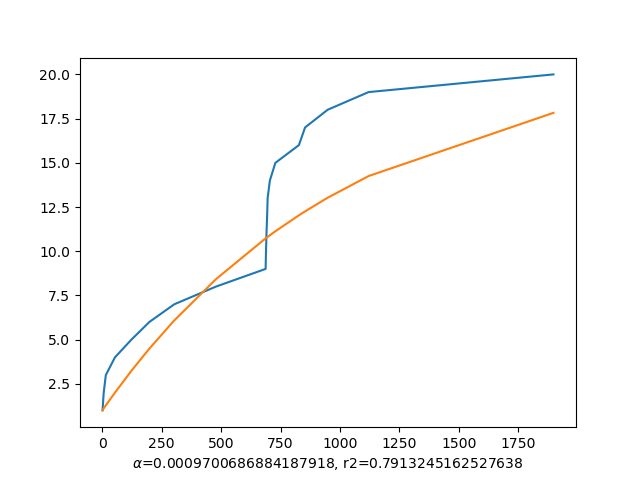

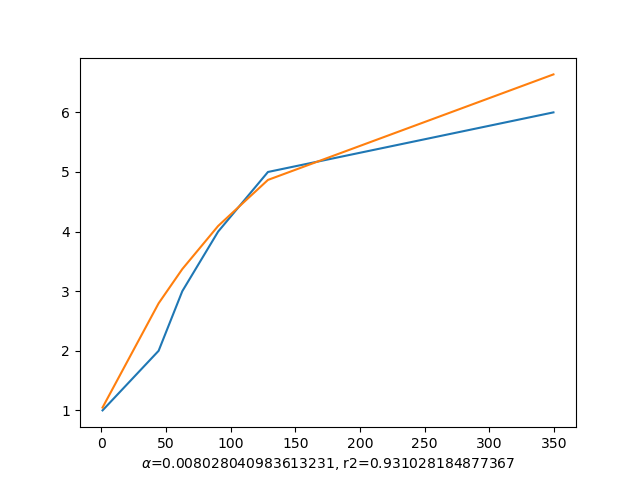

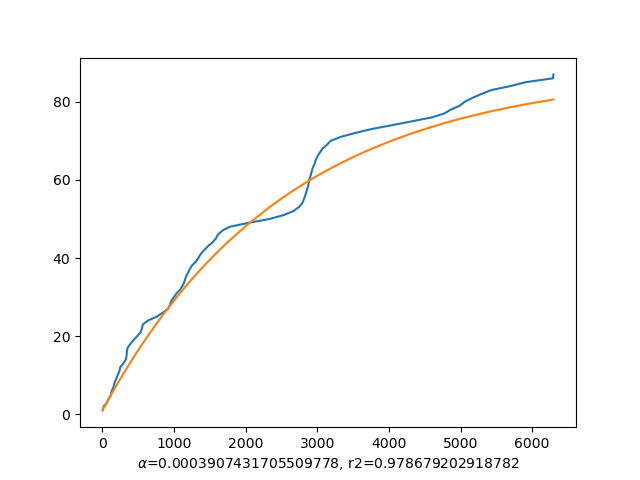

In [11]:
As = []
alphas = []
Ns = []
R2s = []
for e in events:
    Ns.append(e.shape[0])
    try:
        y = e.set_index('time').ones.cumsum().values
        time = e.set_index('time').ones.cumsum().index
        t = np.array([t.timestamp() for t in time])
        t = t - t.min()
        t = t + 1
        params, cov = optimize.curve_fit(curvefunc, t, y, p0=(e.shape[0], 5/10800))
        # print(params)
        
        A, alpha = params
        
        nt = curvefunc(t, a=y.shape[0], b=alpha)
        # nt = curvefunc(t, a=y.shape[0], b=2.978e-4)
        
        r2 = metrics.r2_score(y_true=y, y_pred=nt)
        R2s.append(r2)
        print('N-events:', str(y.shape[0]), 'A:', A, 'alpha:', alpha, 'r2:', r2)
        As.append(params[0])
        alphas.append(params[1])
        
        fig, ax = plt.subplots()
        ax.plot(t, y)
        ax.plot(t, nt)
        ax.set_xlabel(r'$\alpha$={a}, r2={r2}'.format(a=alpha, r2=r2))
        
    except RuntimeError as e:
        print('There was RunTimeError, N-events:'+str(y.shape[0]),e)
        
print(sorted(alphas)[len(alphas)//2])
print(sorted(alphas))

In [12]:
def get_yt(event):
    y = event.set_index('time').ones.cumsum().values
    time = event.set_index('time').ones.cumsum().index
    t = np.array([t.timestamp() for t in time])
    t = t - t.min()
    t = t + 1
    return y, t

def john_curve(t, A, alpha):
    return A*(1 - np.exp(-alpha*t))

def scipy_curve(t, y):
    params, cov = optimize.curve_fit(curvefunc, t, y, p0=(y.max(), 5/10800))
    return params

def john_scipy_compare_plot(event, john_alpha):
    y, t = get_yt(event=event)
    john_nt = john_curve(t=t, A=y.max(), alpha=john_alpha)
    try:
        scipy_A, scipy_alpha = scipy_curve(t=t, y=y)
    except RuntimeError as e:
        print(e)
        print('setting scipy_alpha to john_alpha')
        scipy_alpha = john_alpha
    
    fig, ax = plt.subplots()
    ax.plot(t, y, label='data')
    ax.plot(t, john_nt, label='john squares, alpha={:.3e}'.format(john_alpha))
    model_nt = john_curve(t=t, A=y.max(), alpha=scipy_alpha)
    ax.plot(t, model_nt, label='least squares, alpha={:.3e}'.format(scipy_alpha))
    ax.set_xlabel('start time: ' + str(event.time.min()))
    ax.legend()
    
    print('john squares r2:', metrics.r2_score(y, john_nt))
    print('least squares r2:', metrics.r2_score(y, model_nt))
    print('N-events:', y.max())

john squares r2: 0.8590514384077077
least squares r2: 0.9347041112098009
N-events: 380


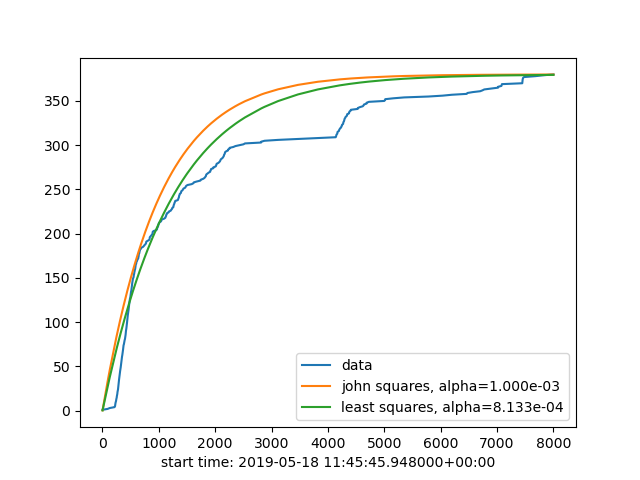

In [13]:
john_scipy_compare_plot(event=events[0], john_alpha=1e-3)

john squares r2: 0.8448603376981586
least squares r2: -0.9344817818755531
N-events: 871


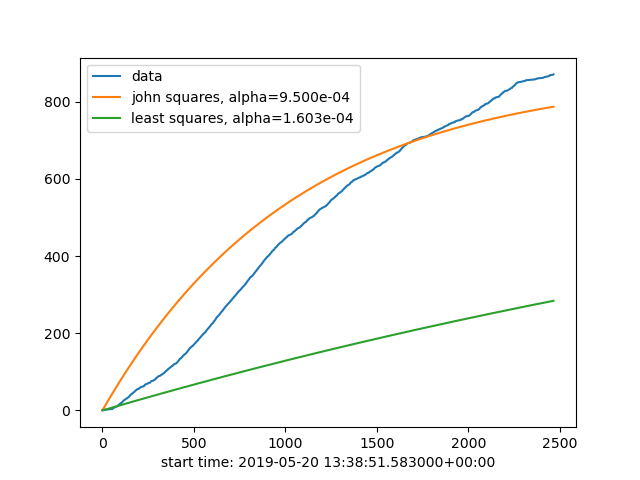

In [14]:
john_scipy_compare_plot(event=events[1], john_alpha=0.95e-3)

john squares r2: 0.9850480397571764
least squares r2: 0.980762685943552
N-events: 82


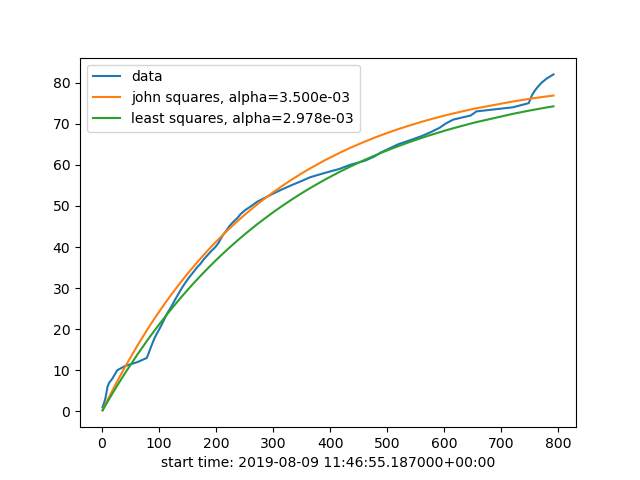

In [15]:
john_scipy_compare_plot(event=events[2], john_alpha=3.5e-3)

john squares r2: 0.8752727671863599
least squares r2: 0.085280107318768
N-events: 103


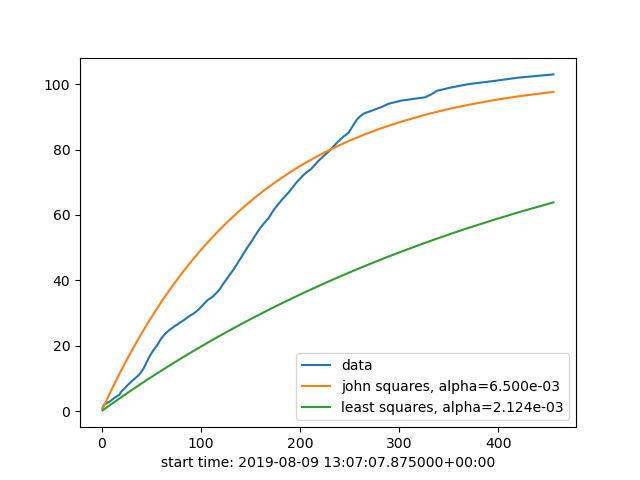

In [16]:
john_scipy_compare_plot(event=events[3], john_alpha=6.5e-3)

Optimal parameters not found: Number of calls to function has reached maxfev = 600.
setting scipy_alpha to john_alpha
john squares r2: 0.6023866285014636
least squares r2: 0.6023866285014636
N-events: 243


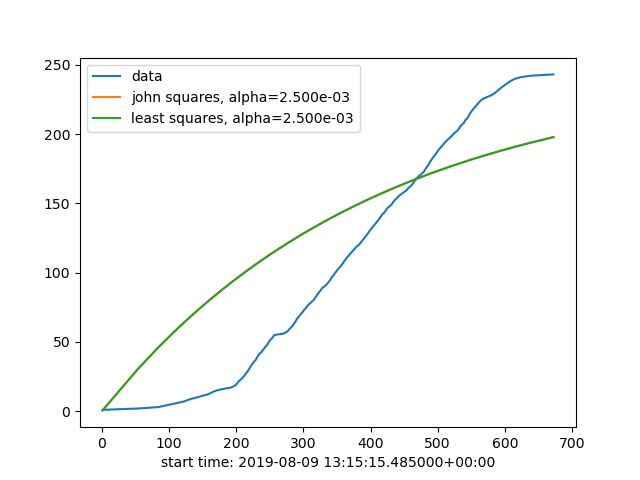

In [17]:
john_scipy_compare_plot(event=events[4], john_alpha=2.5e-3)

john squares r2: 0.8585992302887979
least squares r2: -1.479421939398636
N-events: 37


/tmp/ipykernel_1289/2327526356.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


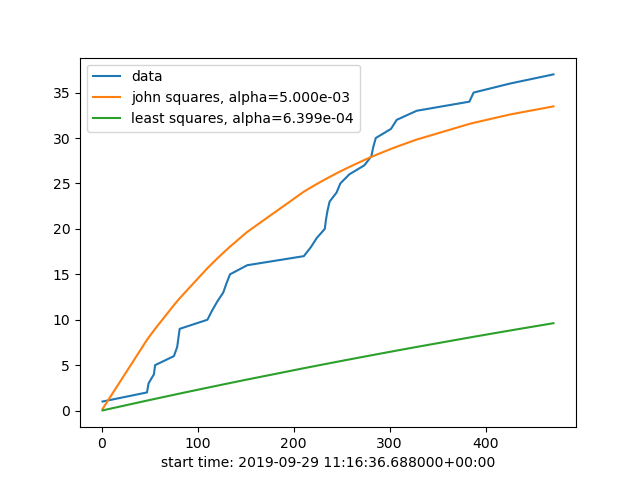

In [18]:
john_scipy_compare_plot(event=events[5], john_alpha=5e-3)

john squares r2: 0.6268994415005944
least squares r2: -1.0284395617748738
N-events: 214


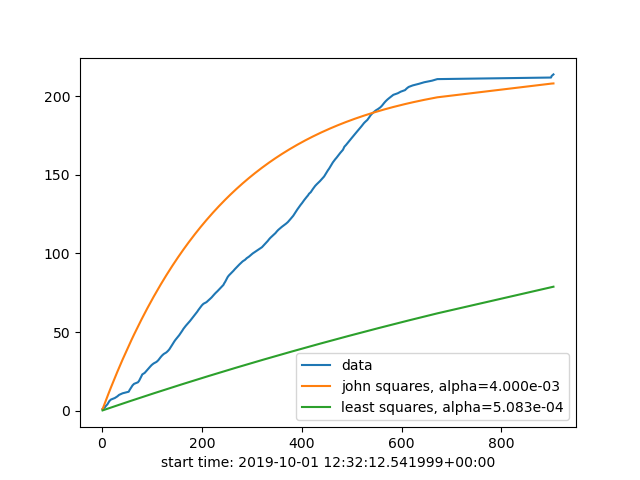

In [19]:
john_scipy_compare_plot(event=events[6], john_alpha=4e-3)

john squares r2: 0.8672724708366835
least squares r2: 0.9056558309615519
N-events: 15


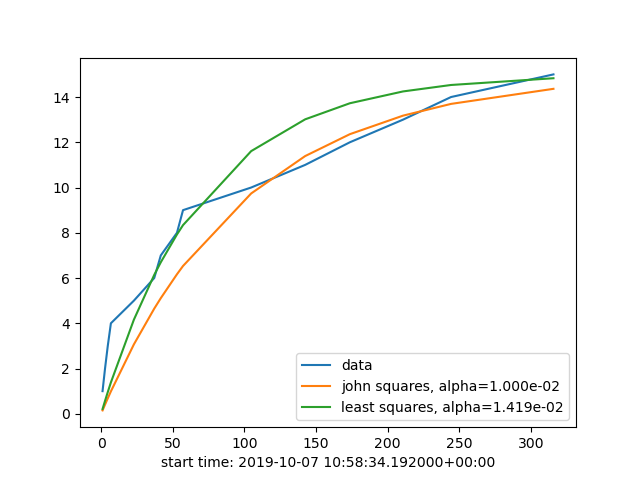

In [20]:
john_scipy_compare_plot(event=events[7], john_alpha=1e-2)

john squares r2: 0.8039733571544594
least squares r2: 0.6497432053341512
N-events: 20


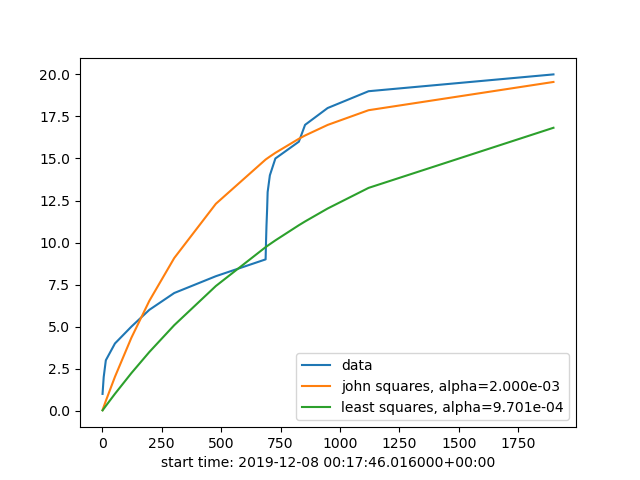

In [21]:
john_scipy_compare_plot(event=events[8], john_alpha=2e-3)

john squares r2: 0.8676316993109411
least squares r2: 0.7954581599045845
N-events: 6


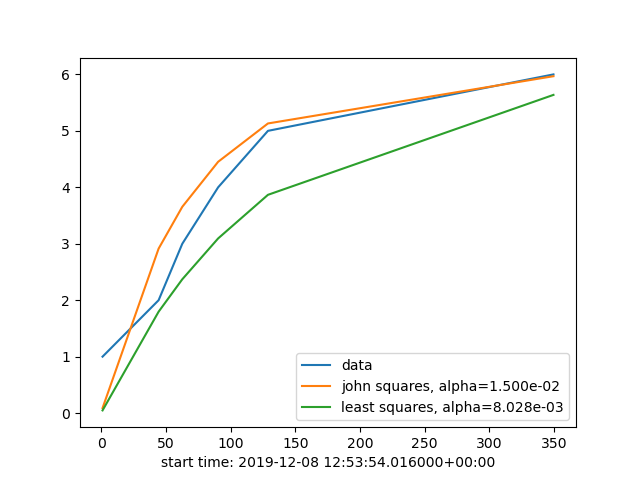

In [22]:
john_scipy_compare_plot(event=events[9], john_alpha=1.5e-2)

john squares r2: -2.3630316924420147
least squares r2: 0.9695958231250519
N-events: 87


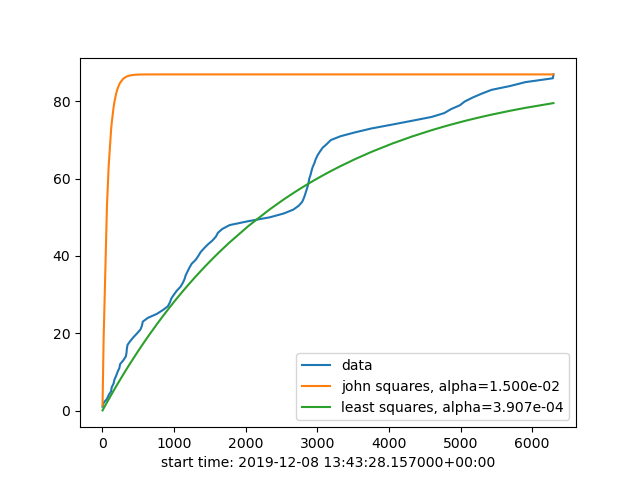

In [23]:
john_scipy_compare_plot(event=events[10], john_alpha=1.5e-2)

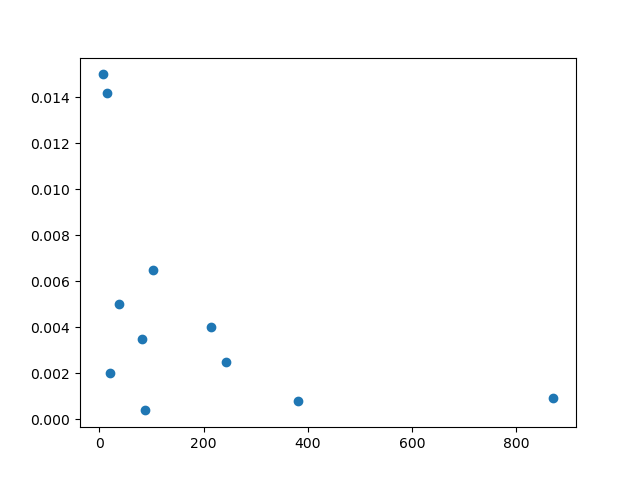

In [24]:
Ns = [380, 871, 82, 103, 243, 37, 214, 15, 20, 6, 87]
alphas = [8.133e-4, 9.5e-4, 3.5e-3, 6.5e-3, 2.5e-3, 5e-3, 4e-3, 1.419e-2, 2e-3, 1.5e-2, 3.907e-4]

fig, ax = plt.subplots()

ax.scatter(Ns, alphas)
# ax.set_yscale('log')
# ax.set_xscale('log')

0.0049858181818181815
0.0048652804368052955
0.000120537745012886 <---- 0.0049858181818181815 ----> 0.009851098618623478


[0.0003907,
 0.0008133,
 0.00095,
 0.002,
 0.0025,
 0.0035,
 0.004,
 0.005,
 0.0065,
 0.01419,
 0.015]

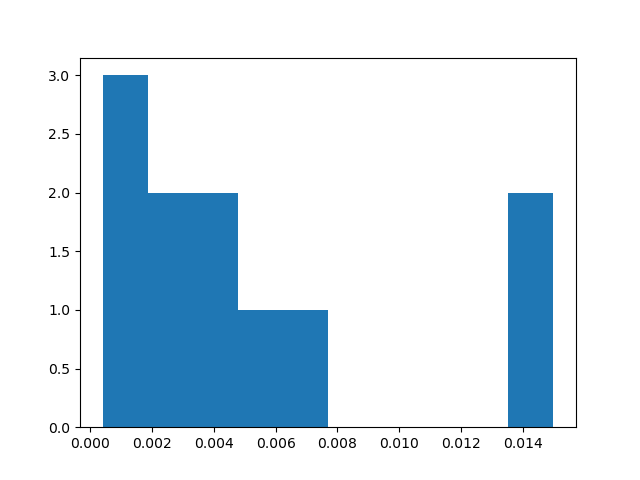

In [34]:
a = np.array(alphas)
print(a.mean())
print(a.std())
print(a.mean()-a.std(), '<----', a.mean(), '---->', a.mean()+a.std())

fig, ax = plt.subplots()
ax.hist(a)
# ax.set_xscale('log')
sorted(a)

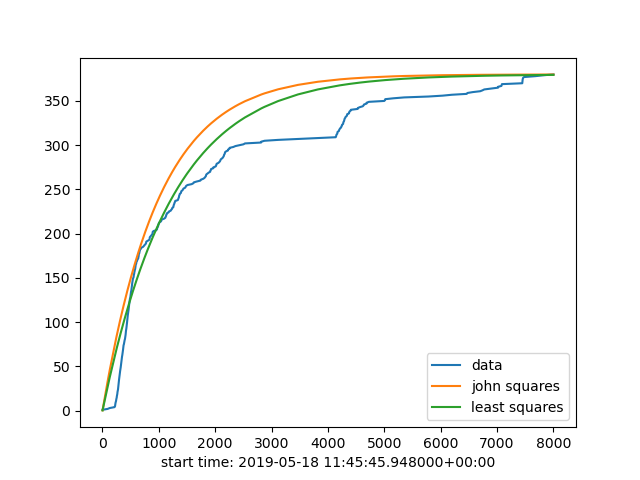

In [186]:
y, t = get_yt(event=events[0])

def john_scipy_compare_plot():
fig, ax = plt.subplots()
ax.plot(t, y, label='data')

john_nt = john_curve(t=t, A=y.max(), alpha=1e-3)
ax.plot(t, john_nt, label='john squares')

scipy_A, scipy_alpha = scipy_curve(t=t, y=y)
ax.plot(t, john_curve(t=t, A=y.max(), alpha=scipy_alpha), label='least squares')
ax.set_xlabel('start time: ' + str(events[0].time.min()))

ax.legend()

N-events: 380 A: 351.43946327921486 alpha: 0.0008132643498728344 r2: 0.9316534481710586
N-events: 903 A: 1199.6949751675452 alpha: 0.0004662211385293909 r2: 0.7168702670869861
N-events: 82 A: 84.42747068937715 alpha: 0.0029780534013881914 r2: 0.9866661841603263
N-events: 103 A: 191.51425734211438 alpha: 0.002123603235228541 r2: 0.1387046163922061
There was RunTimeError, N-events:243 Optimal parameters not found: Number of calls to function has reached maxfev = 600.
N-events: 37 A: 153.90955454080495 alpha: 0.0006398790349415184 r2: -1.2320751316698444
N-events: 214 A: 726.5400281006208 alpha: 0.0005082928270025862 r2: -0.9890698613934643
N-events: 15 A: 12.879323991526755 alpha: 0.014194921589149858 r2: 0.8639107000262424
N-events: 20 A: 24.313099505242345 alpha: 0.0009700686884187918 r2: 0.7913245162527638
N-events: 6 A: 5.476845424360296 alpha: 0.008028040983613231 r2: 0.931028184877367
N-events: 87 A: 91.09933967581688 alpha: 0.0003907431705509778 r2: 0.978679202918782
0.00097006868

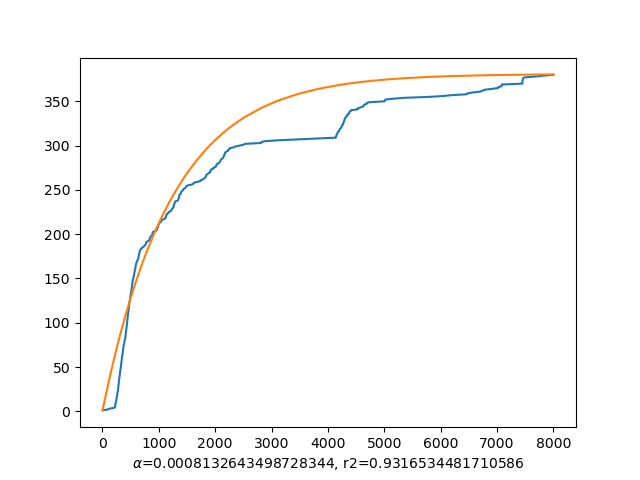

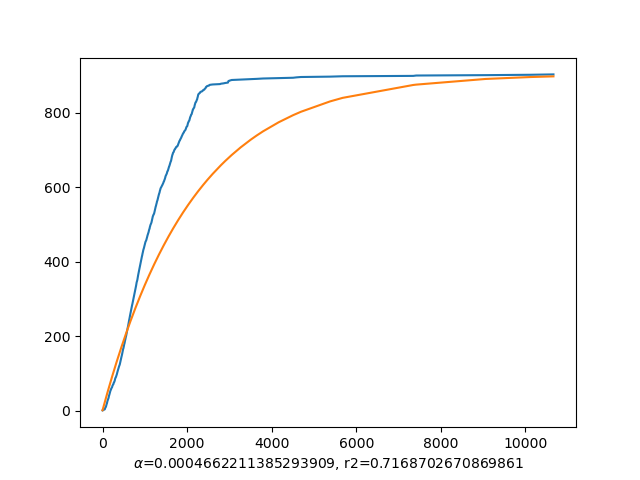

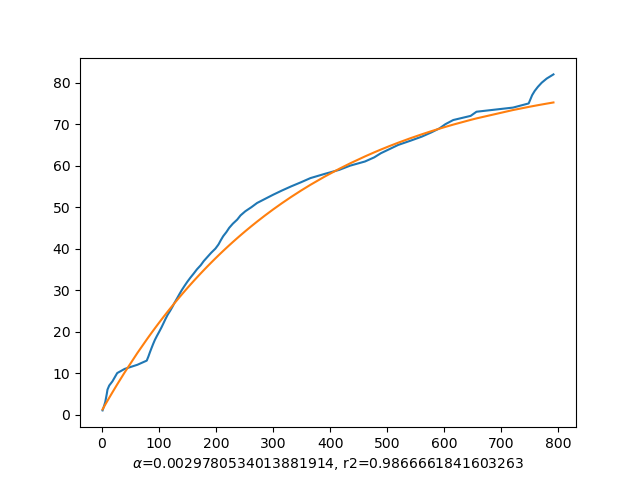

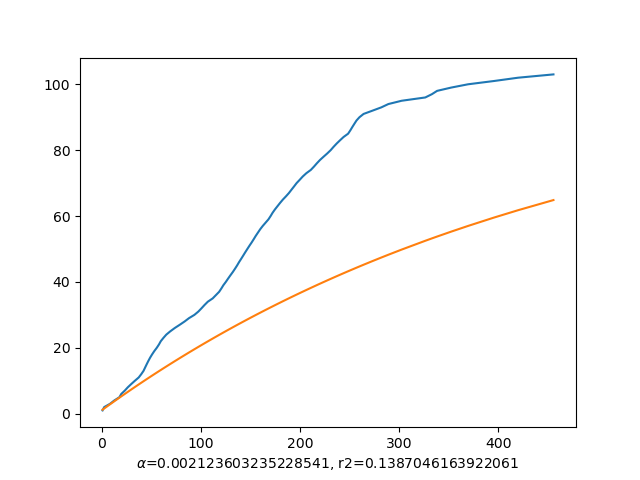

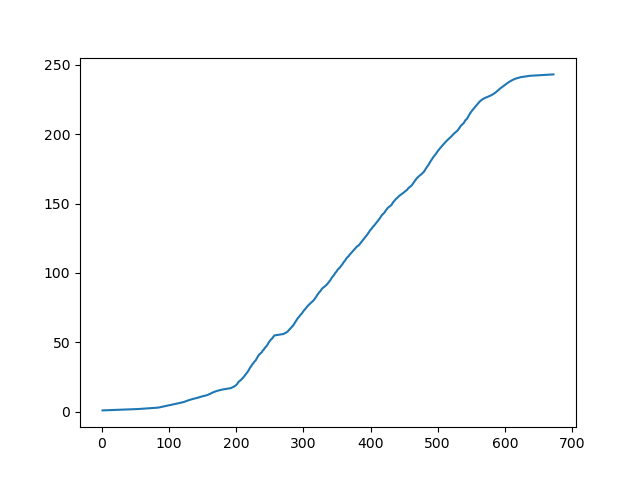

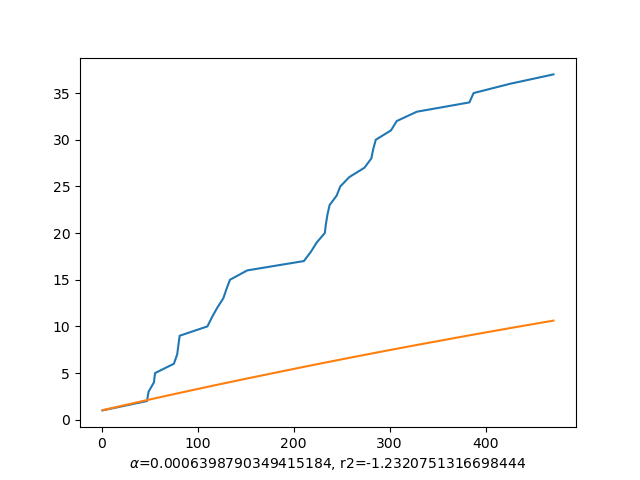

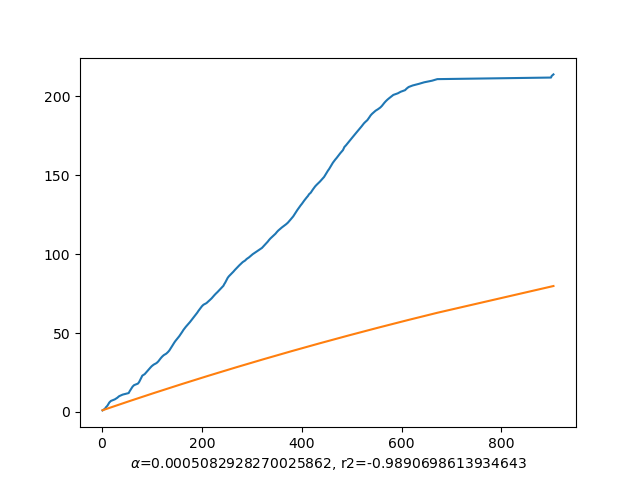

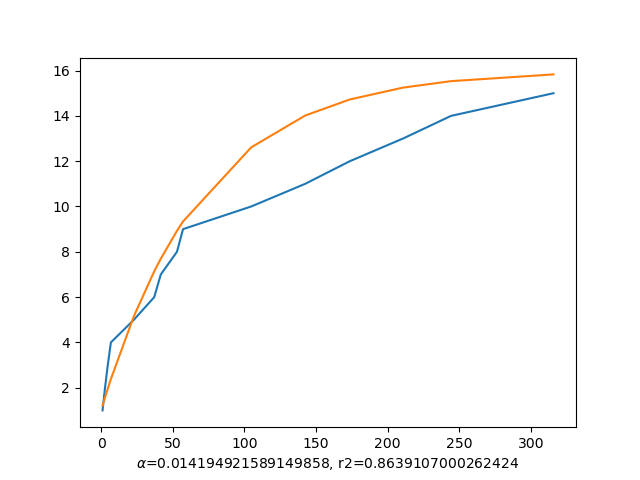

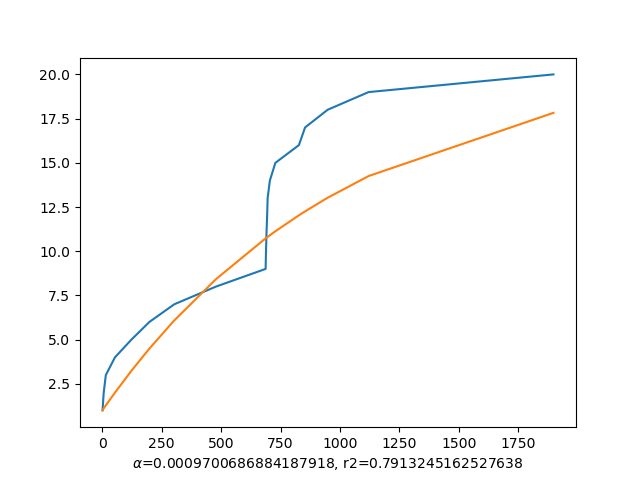

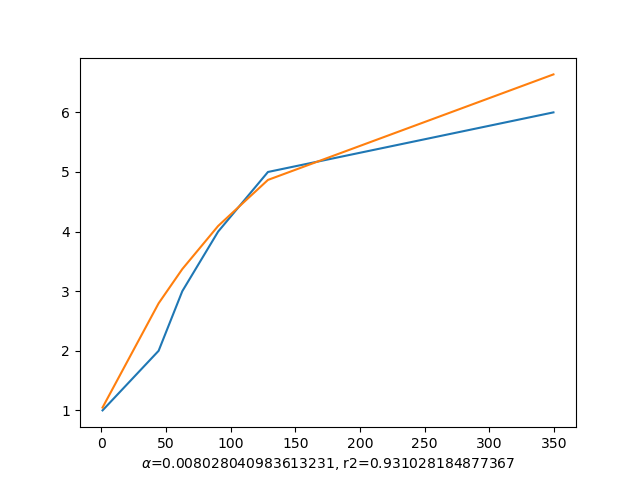

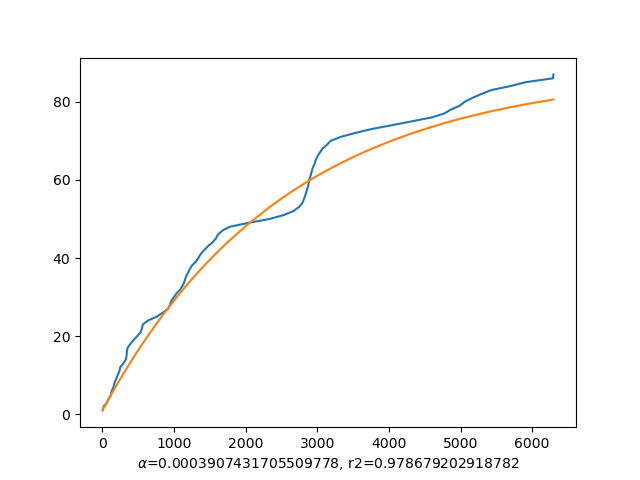

In [125]:
As = []
alphas = []
Ns = []
R2s = []
for e in events:
    Ns.append(e.shape[0])
    try:
        y = e.set_index('time').ones.cumsum().values
        time = e.set_index('time').ones.cumsum().index
        t = np.array([t.timestamp() for t in time])
        t = t - t.min()
        t = t + 1
        params, cov = optimize.curve_fit(curvefunc, t, y, p0=(e.shape[0], 5/10800))
        # print(params)
        
        A, alpha = params
        
        nt = curvefunc(t, a=y.shape[0], b=alpha)
        # nt = curvefunc(t, a=y.shape[0], b=2.978e-4)
        
        r2 = metrics.r2_score(y_true=y, y_pred=nt)
        R2s.append(r2)
        print('N-events:', str(y.shape[0]), 'A:', A, 'alpha:', alpha, 'r2:', r2)
        As.append(params[0])
        alphas.append(params[1])
        
        fig, ax = plt.subplots()
        ax.plot(t, y)
        ax.plot(t, nt)
        ax.set_xlabel(r'$\alpha$={a}, r2={r2}'.format(a=alpha, r2=r2))
        
    except RuntimeError as e:
        print('There was RunTimeError, N-events:'+str(y.shape[0]),e)
        
print(sorted(alphas)[len(alphas)//2])
print(sorted(alphas))

In [28]:
alphas

[0.0008132643498728344,
 0.0004662211385293909,
 0.0029780534013881914,
 0.002123603235228541,
 0.0006398790349415184,
 0.0005082928270025862,
 0.014194921589149858,
 0.0009700686884187918,
 0.008028040983613231,
 0.0003907431705509778]

In [72]:
Ns[0:5] + Ns[6:]

[380, 903, 82, 103, 243, 214, 15, 20, 6, 87]

Text(0.5, 0, 'alpha')

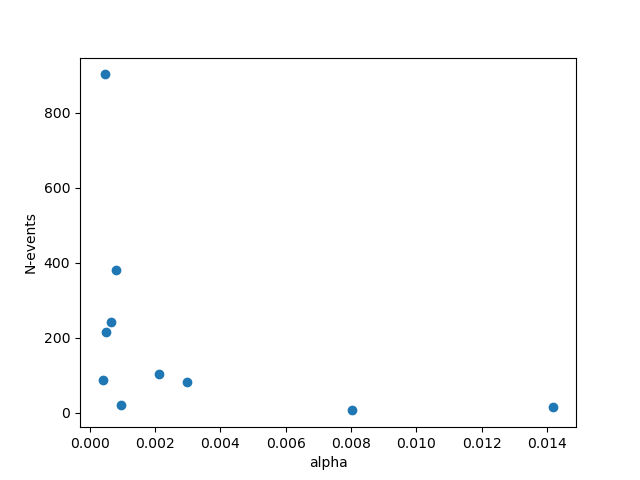

In [75]:
fig, ax = plt.subplots()
NS = Ns[0:5] + Ns[6:]
ax.scatter(alphas, NS)
select = [1,3, 4, 5,]
# ax.scatter(np.array(alphas)[select], np.array(Ns)[select], marker='x')
# ax.scatter(alphas[[]])
# ax.plot()
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylabel('N-events')
ax.set_xlabel('alpha')

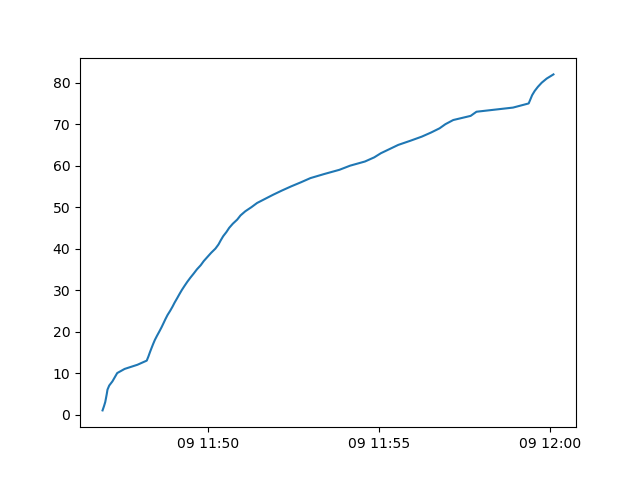

In [10]:
fig, ax = plt.subplots()

t = event4.time
y = event4.ones.cumsum()

ax.plot(t, y)

In [11]:
# events = [event1
#           # , event2
#           , event3, event4, event5, event6, event7, event8
#           # , event9
#           , event10, event11]

[3.62105386e+02 7.69797291e-04] [[ 6.89100404e+00 -2.67359119e-05]
 [-2.67359119e-05  2.02730118e-10]]
rmse homemade: 39.6457322487158
rmse scipy.optimize: 33.5724025728551
r2 homemade: 0.8832855267139696
r2 scipy.optimize: 0.9163055477053881


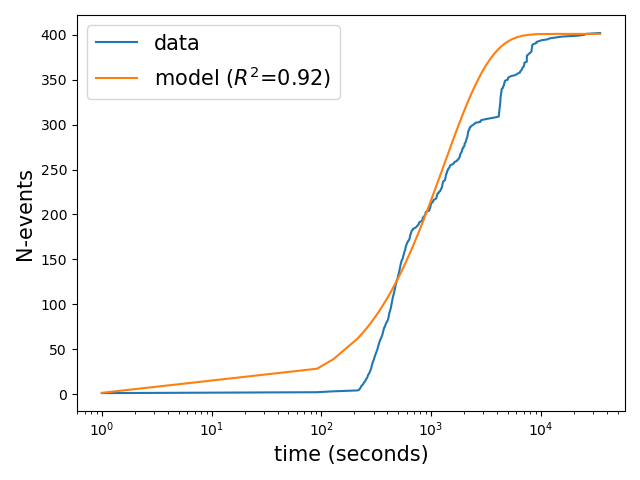

In [23]:
# >>> scipy.optimize.curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y,  p0=(4, 0.1))
# >>> scipy.optimize.curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y,  p0=(4, 0.1))
# (array([ 4.88003249,  0.05531256]),
#  array([[  1.01261314e+01,  -4.31940132e-02],
#         [ -4.31940132e-02,   1.91188656e-04]]))
# # y ≈ 4.88 exp(0.0553 x). much better.

y = bubsub.set_index('time').ones.cumsum().values
time = bubsub.set_index('time').ones.cumsum().index

t = np.array([t.timestamp() for t in time])
t = t - t.min()
t = t + 1
alpha = 1/(t[-1] - t[0])
alpha = 5/10800
nt = 1 + 400*(1 - np.exp(-alpha*t))

fig, ax = plt.subplots()
# ax.plot(t, nt, label='model')
ax.plot(t, y, label='data')

# ax.set_xlim(1e0, 4e4)

from scipy import optimize
def curvefunc(t, a, b):
    return 1+a*(1 - np.exp(-b*t))

params, cov = optimize.curve_fit(curvefunc, t, y, p0=(450, 50/10800))
A, alpha = params
# nt_fit = 1 + A*(1-)
print(params, cov)
# nt_fit = 1 + A*(1 - np.exp(-alpha*t))
# nt_fit = curvefunc(t, a=A, b=alpha)
nt_fit = curvefunc(t, a=400, b=alpha)

# ax.plot(t, nt_fit, label='scipy.optimize')
ax.plot(t, nt_fit, label='model ($R^2$={r2})'.format(r2=round(metrics.r2_score(y_true=y, y_pred=nt_fit),2)))

ax.legend(fontsize=15)
ax.set_xscale('log')

ax.set_xlabel('time (seconds)', fontsize=15)
ax.set_ylabel('N-events', fontsize=15)
fig.tight_layout()
fig.savefig('supp2_model.pdf', bbox_inches='tight')

print('rmse homemade:', np.sqrt(metrics.mean_squared_error(y_true=y, y_pred=nt)))
print('rmse scipy.optimize:', np.sqrt(metrics.mean_squared_error(y_true=y, y_pred=nt_fit)))


print('r2 homemade:', metrics.r2_score(y_true=y, y_pred=nt))
print('r2 scipy.optimize:', metrics.r2_score(y_true=y, y_pred=nt_fit))

[3.62105386e+02 7.69797291e-04] [[ 6.89100404e+00 -2.67359119e-05]
 [-2.67359119e-05  2.02730118e-10]]


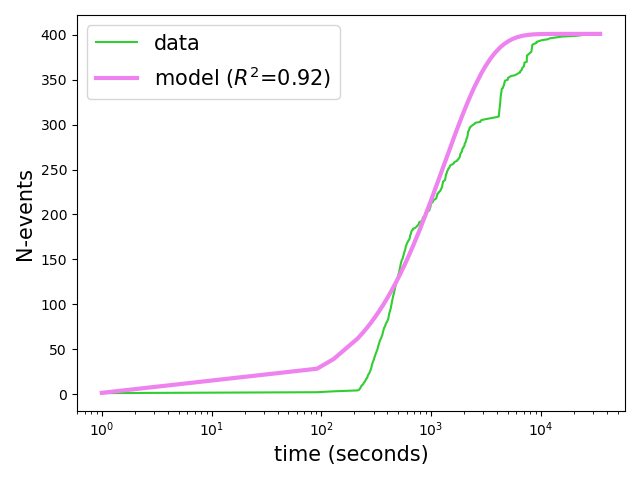

In [108]:
# >>> scipy.optimize.curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y,  p0=(4, 0.1))
# >>> scipy.optimize.curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y,  p0=(4, 0.1))
# (array([ 4.88003249,  0.05531256]),
#  array([[  1.01261314e+01,  -4.31940132e-02],
#         [ -4.31940132e-02,   1.91188656e-04]]))
# # y ≈ 4.88 exp(0.0553 x). much better.

y = bubsub.set_index('time').ones.cumsum().values
time = bubsub.set_index('time').ones.cumsum().index

t = np.array([t.timestamp() for t in time])
t = t - t.min()
t = t + 1

fig, ax = plt.subplots()
ax.plot(t, y, label='data', color='limegreen')


from scipy import optimize
def curvefunc(t, a, b):
    return 1+a*(1 - np.exp(-b*t))

params, cov = optimize.curve_fit(curvefunc, t, y, p0=(450, 50/10800))
A, alpha = params
print(params, cov)
nt_fit = curvefunc(t, a=400, b=alpha)

ax.plot(t, nt_fit, color='violet', linewidth=3, label='model ($R^2$={r2})'.format(r2=round(metrics.r2_score(y_true=y, y_pred=nt_fit),2)))

ax.legend(fontsize=15)
ax.set_xscale('log')

ax.set_xlabel('time (seconds)', fontsize=15)
ax.set_ylabel('N-events', fontsize=15)
fig.tight_layout()
fig.savefig('supp2_model.pdf', bbox_inches='tight')

In [14]:
# t.shape

In [17]:
dts = []
deltaT = [0,]
for n in np.arange(0, bubbles.shape[0], 1):
    if n+1 == bubbles.shape[0]:
        break
        
    dt = bubbles.time[n+1] - bubbles.time[n]
    dts.append(dt)
    # deltaT.append(dt.seconds)
    deltaT.append(dt.seconds+dt.microseconds*1e-6)
    
bubbles['TimeDelta'] = dt
bubbles['deltaT_sec'] = deltaT

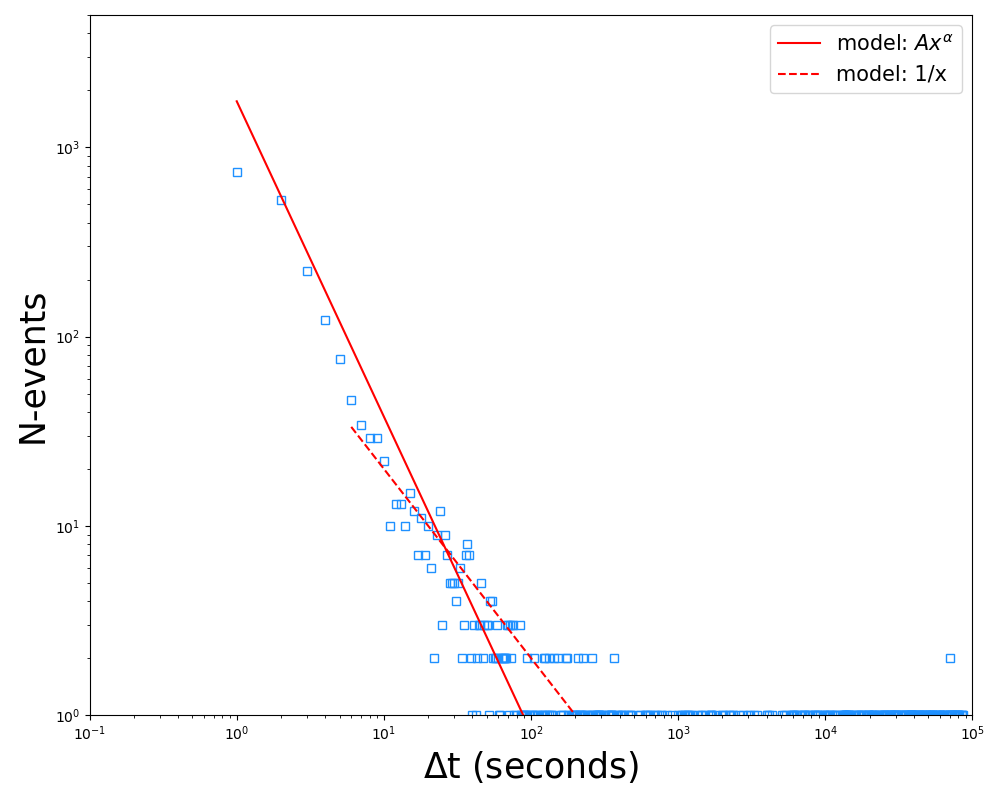

In [18]:
h, e = np.histogram(bubbles.deltaT_sec[1:], bins=np.linspace(0, 100000, 100000) )
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(e[:-1], h, color='dodgerblue', linewidth=0, marker='s', fillstyle='none')
# ax.set_xscale('log')
ax.set_xlim(1e-1, 1e5)
ax.set_ylim(1e0, 5e3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('N-events', fontsize=25)
ax.set_xlabel('$\Delta$t (seconds)', fontsize=25)

x = np.arange(1e0, 2e2)
y = 1750*x**(-1.666) # satan number
ax.plot(x, y, color='red', label=r'model: $A x^{\alpha}$')
ax.plot(x[5:], 200*1/x[5:], color='red', linestyle='--', label='model: 1/x')
# ax.plot(h[h<0], color='red', marker='s')

ax.legend(fontsize=15)

fig.tight_layout()
fig.savefig('intereventtime.pdf', bbox_inches='tight')

In [ ]:
# x

In [ ]:
# fig, ax = plt.subplots()
# ax.plot( h[h>0], marker='s', linewidth=0)
# ax.set_yscale('log')
# ax.set_xscale('log')

In [ ]:
# bubbles.deltaT_sec[1:].min()

In [ ]:
# bubbles.deltaT_sec[1:].max()

In [ ]:
# e

In [ ]:
x = bubbles.deltaT_sec[1:].sort_values()
y = x.cumsum()

fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(x, y, color='red')
ax.plot(np.arange(1, x.shape[0]+1, 1), y, color='red', marker='^', linewidth=0)
# ax.plot([0, 1e5], [0, 1e5])
ax.set_ylim(1e0, 1e7)
# ax.set_xlim(1e-1, 1e5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('cumsum($\Delta$t) (seconds)', fontsize=25)
ax.set_xlabel('log N-events', fontsize=25)
fig.tight_layout()

In [ ]:
# bubbles.deltaT_sec[1:].sort_values().max()

In [ ]:
# x